In [6]:
import numpy as np
import matplotlib.pylab as plt

In [7]:
class SGD:
    def _init_(self, Ir=0.01):
        self.Ir =Ir

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.Ir * grads[key]

In [8]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        print("Momentum 생성")

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [9]:
class AdaGrad:
    def __init__ (self, Ir=0.01):
        self.Ir =Ir
        self.h = None
        print("AdaGrad 생성")
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys() :
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.Ir * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


# 오버피팅
- 한쪽으로 치우쳐진 학습으로 범용성이 떨어진 것

### 오버피팅의 발생
- 학습 데이터와 시험 데이터 정확도의 차이가 크다
- 이는 학습 데이터에만 유의미한 결과를 보이고, 실제 문제에 대해서는 다른 답을 제시한다는 의미

----
### 수업 자료에 있는 코드

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5) :
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np. random. rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask


# 드롭아웃
- 필요없는 뉴런을 선별하고 삭제하여 학습할 때 효과를 높인다

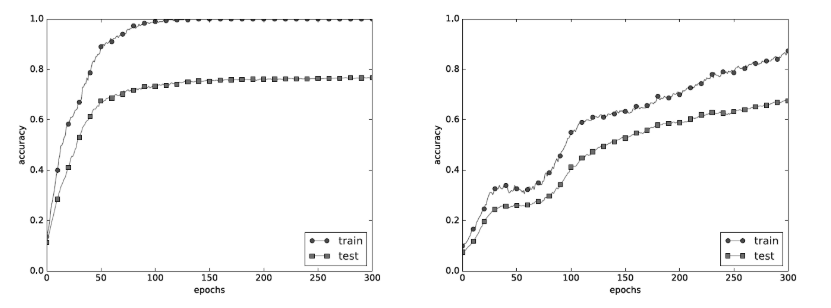

## **왼쪽**은 둘다 높은 것 처럼 보이지만 학습과 시험의 정확도 차이가 크다 - 오버피팅
## **오른쪽**은 둘이 적당한 간격으로 나타나 오버피팅을 어느정도 해소한 상태이다

# 하이퍼피라미터 단계
1. 값 설정
2. 값을 무작위로 추출
3. 학습하고 정확도 평가
4. 반복하여 하이퍼피라미터 값의 범위를 좁힌다